In [5]:
import csv
bridge = csv.reader('bridge.csv', dialect='excel')

In [19]:
import pandas as pd
data = pd.read_csv('bridge.csv', index_col='Date',parse_dates=True) #permet de commencer database par colonne Date
#parse_date = permet que panda identifie les valeurs comme des dates et non des strings
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2019-01-01 02:00:00,1.0,11.0
2019-01-01 03:00:00,1.0,2.0
2019-01-01 04:00:00,2.0,1.0


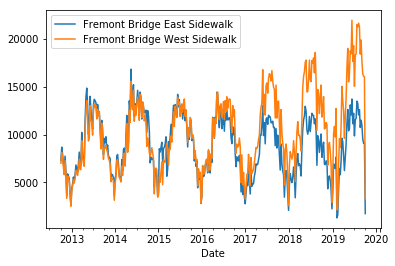

In [14]:
%matplotlib inline
data.resample('W').sum().plot();
#on a recalculer les lignes par semaine en faisant 
#la somme de chaque colonne pour chaque semaine

,West,East
Date,,
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2019-01-01 02:00:00,1.0,11.0
2019-01-01 03:00:00,1.0,2.0
2019-01-01 04:00:00,2.0,1.0


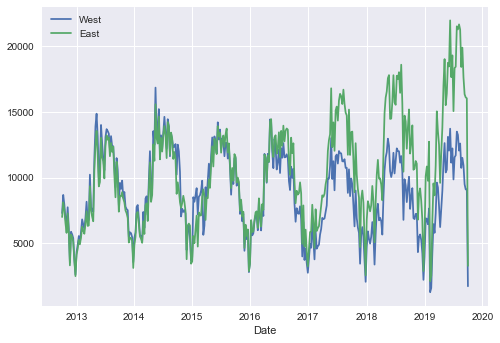

In [20]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

data.columns = ('West', 'East')

data.resample('W').sum().plot();


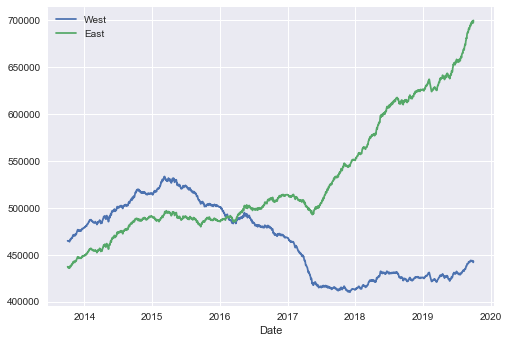

In [41]:
data.resample('D').sum().rolling(365).sum().plot();
#fenetre glissante sur somme des passages dans les 365
#Pour le point 2014 => entre le 1er janvier 2014 et le 1er janvier 2013
#il y a eu 450 000 passages

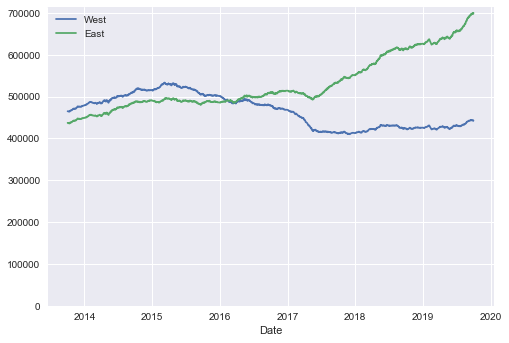

In [49]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);
#permet de commencer l'axe des y à 0

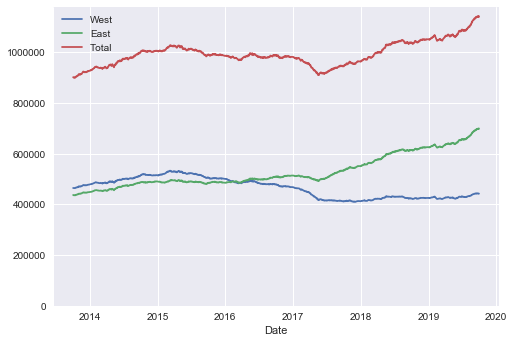

In [50]:
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

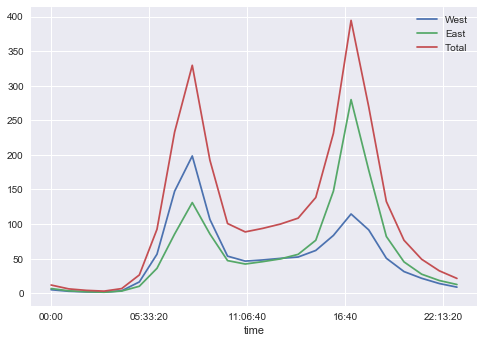

In [55]:
 data.groupby(data.index.time).mean().plot();
# trend within individual day, groupby by the time of day

For all the day we average the number of crossing each time of day

In [56]:
pivoted = data.pivot_table('Total', index=data.index.time, columns = data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


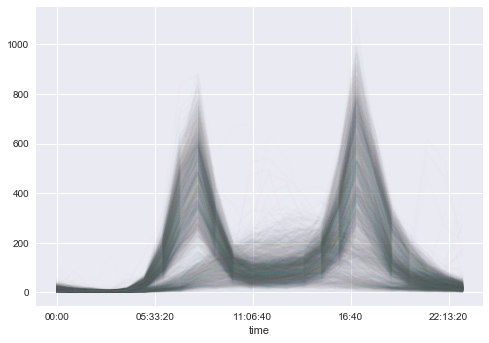

In [58]:
pivoted.plot(legend=False, alpha=0.01);

We have a line of each day of a year.
Alpha is the transparency.

 test pour github
 